Problem statement - There are times when a user writes Good, Nice App or any other positive text, in the review and gives 1-star rating. Your goal is to identify the reviews where the semantics of review text does not match rating. 

Your goal is to identify such ratings where review text is good, but rating is negative- so that the support team can point this to users. 


In [1]:
import numpy as np
import pandas as pd

In [2]:
chrome_reviews = pd.read_csv("chrome_reviews.csv")
chrome_reviews.head()

,ID,Review URL,Text,Star,Thumbs Up,User Name,Developer Reply,Version,Review Date,App ID
0,3886,https://play.google.com/store/apps/details?id=...,This is very helpfull aap.,5,0,INDIAN Knowledge,NaN,83.0.4103.106,2020-12-19,com.android.chrome
1,3887,https://play.google.com/store/apps/details?id=...,Good,3,2,Ijeoma Happiness,NaN,85.0.4183.127,2020-12-19,com.android.chrome
2,3888,https://play.google.com/store/apps/details?id=...,Not able to update. Neither able to uninstall.,1,0,Priti D BtCFs-29,NaN,85.0.4183.127,2020-12-19,com.android.chrome
3,3889,https://play.google.com/store/apps/details?id=...,Nice app,4,0,Ajeet Raja,NaN,77.0.3865.116,2020-12-19,com.android.chrome
4,3890,https://play.google.com/store/apps/details?id=...,Many unwanted ads,1,0,Rams Mp,NaN,87.0.4280.66,2020-12-19,com.android.chrome


In [3]:
chrome_reviews.shape

(7204, 10)

In [4]:
chrome_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7204 entries, 0 to 7203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               7204 non-null   int64 
 1   Review URL       7204 non-null   object
 2   Text             7203 non-null   object
 3   Star             7204 non-null   int64 
 4   Thumbs Up        7204 non-null   int64 
 5   User Name        7204 non-null   object
 6   Developer Reply  95 non-null     object
 7   Version          7119 non-null   object
 8   Review Date      7204 non-null   object
 9   App ID           7204 non-null   object
dtypes: int64(3), object(7)
memory usage: 562.9+ KB


In [5]:
df = chrome_reviews[["Text","Star"]]
df.head()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1


In [6]:
df.isnull().sum()

Text    1
Star    0
dtype: int64

In [7]:
df.dropna()

,Text,Star
0,This is very helpfull aap.,5
1,Good,3
2,Not able to update. Neither able to uninstall.,1
3,Nice app,4
4,Many unwanted ads,1
...,...,...
7199,Bagusss..,5
7200,Bad version 😔,1
7201,One thing that I have to say I can't spelled t...,5
7202,Excellent,5


In [8]:
import nltk
import re

nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
port = PorterStemmer()
def text_cleaner (text):
    cleaned= re.sub('[^a-zA-Z]', " ", text) 
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [port.stem (word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    return cleaned

In [10]:
df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x)))
df.head()

<ipython-input-10-11912fe6278b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cleaned_Text"] = df["Text"].apply(lambda x: text_cleaner(str(x)))


,Text,Star,Cleaned_Text
0,This is very helpfull aap.,5,helpful aap
1,Good,3,good
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal
3,Nice app,4,nice app
4,Many unwanted ads,1,mani unwant ad


In [11]:
df["Length"] = df["Text"].apply(lambda x:len(str(x)))
df.head()

<ipython-input-11-a34f6b3ca929>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Length"] = df["Text"].apply(lambda x:len(str(x)))


,Text,Star,Cleaned_Text,Length
0,This is very helpfull aap.,5,helpful aap,26
1,Good,3,good,4
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46
3,Nice app,4,nice app,8
4,Many unwanted ads,1,mani unwant ad,17


In [12]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

def sentiment_vader(text, sid):
    ss = sid.polarity_scores(text)
    ss.pop('compound')
    return max(ss, key=ss.get)

def sentiment_textblob(text):
        x = TextBlob(text).sentiment.polarity
        
        if x<0:
            return 'neg'
        elif x==0:
            return 'neu'
        else:
            return 'pos'

def plot_sentiment_barchart(text, method='TextBlob'):
    if method == 'TextBlob':
        sentiment = text.map(lambda x: sentiment_textblob(x))
    elif method == 'Vader':
        nltk.download('vader_lexicon')
        sid = SentimentIntensityAnalyzer()
        sentiment = text.map(lambda x: sentiment_vader(x, sid=sid))
    else:
        raise ValueError('Textblob or Vader')
    
    plt.bar(sentiment.value_counts().index,
            sentiment.value_counts())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


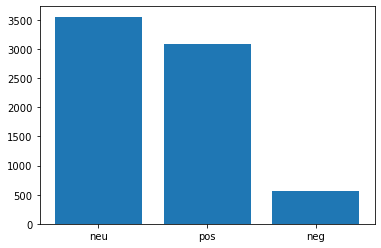

In [13]:
plot_sentiment_barchart(df['Cleaned_Text'], method='Vader')

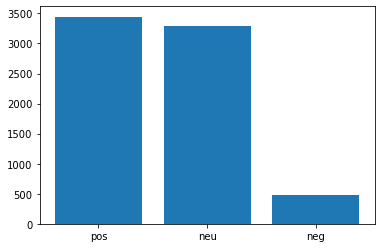

In [14]:
plot_sentiment_barchart(df['Cleaned_Text'], method='TextBlob')

In [15]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [16]:
sid = SentimentIntensityAnalyzer()

In [17]:
df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))
df.head()

<ipython-input-17-d927215f6368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vader_Score"] = df["Cleaned_Text"].apply(lambda review:sid.polarity_scores(review))


,Text,Star,Cleaned_Text,Length,Vader_Score
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp..."
4,Many unwanted ads,1,mani unwant ad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [18]:
df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])
df.head()

<ipython-input-18-ac70cf4e3ef6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Vader_Compound_Score"]  = df['Vader_Score'].apply(lambda score_dict: score_dict['compound'])


,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404
2,Not able to update. Neither able to uninstall.,1,abl updat neither abl uninstal,46,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215
4,Many unwanted ads,1,mani unwant ad,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [19]:
df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))
df.tail()

<ipython-input-19-d0436b3b8a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Result"] = df["Vader_Compound_Score"].apply(lambda c: 'positive' if c > 0 else ('negative' if c < 0 else 'neutral'))


,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
7199,Bagusss..,5,bagusss,9,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
7200,Bad version 😔,1,bad version,13,"{'neg': 0.778, 'neu': 0.222, 'pos': 0.0, 'comp...",-0.5423,negative
7201,One thing that I have to say I can't spelled t...,5,one thing say spell good problem tri spell best,105,"{'neg': 0.171, 'neu': 0.38, 'pos': 0.449, 'com...",0.6597,positive
7202,Excellent,5,excel,9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4588,positive
7203,After update it lag and always slow same goes ...,1,updat lag alway slow goe googlee want work,97,"{'neg': 0.247, 'neu': 0.619, 'pos': 0.134, 'co...",-0.2732,negative


In [20]:
df.Result.value_counts()

positive    3683
neutral     2812
negative     709
Name: Result, dtype: int64

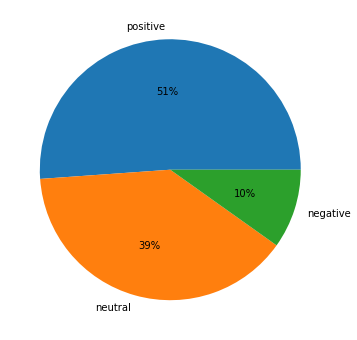

In [21]:
plt.figure(figsize=(8,6))
plt.pie(df["Result"].value_counts(), labels = df["Result"].value_counts().index, autopct="%.0f%%")
plt.show()

In [22]:
df_positive = df[(df.Result == "positive")]
df_positive.tail()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result
7184,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
7190,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive
7195,"Chrome is good, I trust this update will make ...",1,chrome good trust updat make better,56,"{'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'comp...",0.8442,positive
7201,One thing that I have to say I can't spelled t...,5,one thing say spell good problem tri spell best,105,"{'neg': 0.171, 'neu': 0.38, 'pos': 0.449, 'com...",0.6597,positive
7202,Excellent,5,excel,9,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4588,positive


In [28]:
df_positive.head()

,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result,Opinion_Positive
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive,No Attention Needed
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed


In [29]:
Opinion_Positive = []
for row in df_positive["Star"] :
    if row >= 3 :
         Opinion_Positive.append("No Attention Needed")
    else :
         Opinion_Positive.append("Attention Needed")

In [30]:
df_positive["Opinion_Positive"] = Opinion_Positive
df_positive.head()

<ipython-input-30-e0d0ede95e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["Opinion_Positive"] = Opinion_Positive


,Text,Star,Cleaned_Text,Length,Vader_Score,Vader_Compound_Score,Result,Opinion_Positive
0,This is very helpfull aap.,5,helpful aap,26,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
1,Good,3,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed
3,Nice app,4,nice app,8,"{'neg': 0.0, 'neu': 0.263, 'pos': 0.737, 'comp...",0.4215,positive,No Attention Needed
5,This app good,4,app good,13,"{'neg': 0.0, 'neu': 0.256, 'pos': 0.744, 'comp...",0.4404,positive,No Attention Needed
10,Good,5,good,4,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,positive,No Attention Needed


In [31]:
df_positive.Opinion_Positive.value_counts()

No Attention Needed    3192
Attention Needed        491
Name: Opinion_Positive, dtype: int64

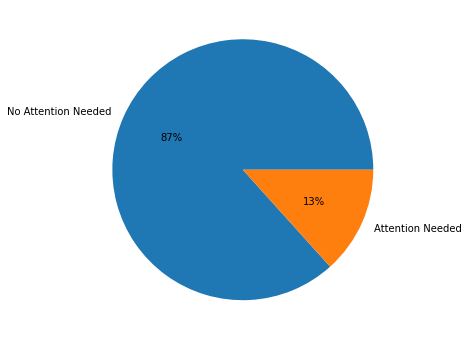

In [32]:
plt.figure(figsize=(8,6))
plt.pie(df_positive["Opinion_Positive"].value_counts(), labels = df_positive["Opinion_Positive"].value_counts().index, autopct="%.0f%%")
plt.show()